# Comorbid-Graphs
Side by side comparison of disorders based on comorbidity factors for clinical psychology.

- create hierarchies of information
- analyse text for psychological terms
- visualize

### Table of Contents
* [Getting Started](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#getting-started)
    - [Installation](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#installation)
    - [Comorbid-Graphs 101](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#comorbid-graphs-101)
* [Usage](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#usage)
    - [Explore](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#explore)
    - [Select](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#select)
    - [Search](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#search)
    - [Advanced Search](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#advanced-search)
* [Analytics](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#analytics)
    - [Compare usage of terms in NeuroDevelopmental Disorders](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#compare-usage-of-terms-in-neurodevelopmental-disorders)
    - [Compare in Overall DSM-V](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#compare-in-overall-dsm-v)
* [Save for later](https://github.com/DorenCalliku/comorbid-graphs/blob/main/ReadMe.ipynb#stats)



## Getting Started

### Installation
You can install `comorbid-graph` in any `python` environment.

In [1]:
# direct usage
# !pip install git+https://github.com/DorenCalliku/comorbid-graphs

# download, cd in this directory, build it
# !pip install .
# !pip install seaborn

### Comorbid-Graphs 101
An example usage is the analysis of DSM-V.  
Create the **ComorbidGraph**:
* yaml file ( ex: good for writing hierarchies for your use )
* json file ( ex: export of ontologies processing )
* raw-json ( easy to process )

In [1]:
from comorbid_graphs import ComorbidGraph
cg = ComorbidGraph.from_json(filepath='examples/dsm_v/dsm_v_labelled.json')
cg.print_head(maxlevel=4, top=20)

dsm-v
├── Neurodevelopmental Disorders
│   ├── Intellectual Disabilities
│   │   ├── Intellectual Disability 
│   │   ├── Global Developmental Delay
│   │   └── Unspecified Intellectual Disabilit (Intellectual Developmental Disorder)
│   ├── Communication Disorders
│   │   ├── Language Disorder
│   │   ├── Speech Sound Disorder
│   │   ├── Childhood-Onset Fluency Disorder (Stuttering)
│   │   ├── Social (Pragmatic) Communication Disorder
│   │   └── Unspecified Communication Disorder
│   ├── Autism Spectrum Disorder
│   │   └── Autism Spectrum Disorder Autism Spectrum Disorder
│   ├── Attention-Deficit/Hyperactivity Disorder
│   │   ├── Attention-Deficit/Hyperactivity Disorder Attention-Deficit/Hyperactivity Disorder
│   │   ├── Other Specified Attention-Deficit/Hyperactivity Disorder
│   │   └── Unspecified Attention-Deficit/Hyperactivity Disorder
│   ├── Specific Learning Disorder
│   │   └── Specific Learning Disorder Specific Learning Disorder
│   ├── Motor Disorders
...



## Exploration
These are methods that might come handy during your work with ComorbidGraphs.   

Explore the whole hierarchy through `cg.explore()` or print just the top info `cg.print_head()`.

* **maxlevel**:  how deep in tree you want to go, print_head default = 3 
* **include_score**: shows on the side how much each result was evaluated, useful in search
* **top**: shows top X lines

In [3]:
cg.print_head(maxlevel=3, top=10)

dsm-v
├── Neurodevelopmental Disorders
│   ├── Intellectual Disabilities
│   ├── Communication Disorders
│   ├── Autism Spectrum Disorder
│   ├── Attention-Deficit/Hyperactivity Disorder
│   ├── Specific Learning Disorder
│   ├── Motor Disorders
│   └── Other Neurodevelopmental Disorders
├── Schizophrenia Spectrum and Other Psychotic Disorders
│   ├── Schizotypal (Personality) Disorder
...



### Select
If you know the name of node that you are looking for, this will return it with all its children.

In [4]:
results_cg = cg.select("Communication Disorders")
results_cg.print_head(maxlevel=3)

Communication Disorders
├── Language Disorder
│   ├── Diagnostic Criteria
│   ├── Diagnostic Features
│   ├── Associated Features Supporting Diagnosis
│   ├── Development and Course
│   ├── Risk and Prognostic Factors
│   ├── Differential Diagnosis
│   └── Comorbidity
├── Speech Sound Disorder
│   ├── Diagnostic Criteria
...



### Search
Finds the related nodes regarding specific terms. You can search multiple terms using `,` between terms.  
It iterates through the nodes, and scores them based on a simple function. After that returns only the included nodes ordered by *relevance*.  

* **select_from**: filter from a certain ancestor that you know
* **filter_type**: based on your preference, you might filter only sections
* **title**:    provide a meaningful title for you

**Warning**: Relevance score is **not** meaningful yet.

In [5]:
# Example: 
results_cg = cg.search(
    "headache,migraine",
    select_from='caffeine',
    filter_type='default,section',
    title='Caffeine Solution',
)
results_cg.print_head()

Caffeine Solution
├── Caffeine Withdrawal
│   ├── Differential Diagnosis
│   ├── Functional Consequences of
│   ├── Prevalence
│   ├── Diagnostic Criteria
│   ├── Diagnostic Features
│   └── Development and Course
└── Caffeine Intoxication
    └── Associated Features Supporting Diagnosis



### Advanced Search

As you can see from previous search, if you have a **high level of granularity** you might want to do some **filtering** so that you will get more meaningful results. For users who are using search a lot for specifics in a hierarchical graph.   
For a more in-depth explanation check [advanced search docs](https://github.com/DorenCalliku/comorbid-graphs/blob/main/docs/search.md).

#### Types of filters
- **inc**: include or filter-in 
- **exc**: exclude or filter-out

#### Element of filters
* **name** : find all the nodes that contain these words in their name/title
* **content** : find all the nodes that contain these words in the body - by default also the unassigned text.
* **type** : filter the nodes that have a type like this
* **text_longer** : filter the nodes with text longer than provided
* **parent** : if parent has name like this

#### Special Filter
* **ancestor** : Checks if any of the names of the ancestors in the tree is like pattern

In [6]:
# Example: Which Disorders in 'DSM-V' contain the term 'depressive disorder'?
# (but I am not interested in neurodevelopmental disorders, and skip small docs too - 
# say skip disorders smaller than 100 characters of text)

query_string = """
depressive disorder
inc_name:        depress,diagnostic criteria
exc_ancestor:    neurodevelopmental
inc_text_longer: 100
"""
# cg.get_query(query_string)

In [7]:
results_cg = cg.advanced_search(query_string)
results_cg.print_head()

Merged results
├── Major Depressive Disorder
│   └── Diagnostic Criteria
├── Substance/Medication-Induced Depressive Disorder
│   └── Diagnostic Criteria
├── Depressive Disorder Due to Another Medical Condition
│   └── Diagnostic Criteria
├── Diagnostic Criteria
└── Persistent Depressive Disorder (Dysthymia)



## Analytics
### Compare usage of terms in NeuroDevelopmental Disorders
Compare usage of terms in Neurodevelopmental Disorders.

Merged results
├── Autism Spectrum Disorder Autism Spectrum Disorder
├── Intellectual Disability 
├── Attention-Deficit/Hyperactivity Disorder Attention-Deficit/Hyperactivity Disorder
├── Specific Learning Disorder Specific Learning Disorder
├── Tic Disorders
├── Motor Disorders Developmental Coordination Disorder
├── Stereotypic Movement Disorder
├── Language Disorder
├── Childhood-Onset Fluency Disorder (Stuttering)
├── Social (Pragmatic) Communication Disorder
...



/home/delta/Desktop/comorbid-graphs/comorbid_graphs/processable/utils.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([all,shared]).set_index("node"))


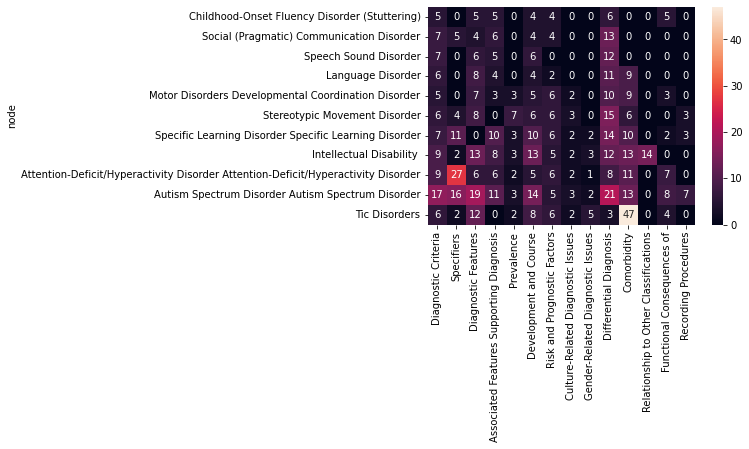

In [8]:
from comorbid_graphs.processable.utils import heatmap_plot_df 

query_string = """
inc_ancestor:  neurodevelopmental
inc_text_longer: 100
"""
results_cg = cg.advanced_search(query_string)
results_cg.print_head(maxlevel=2)

# filter only the sections in the tree
node_list = [
    i for i in results_cg.get_nodes(exclude_head=True) 
    if i.type == 'default'
]

# check comorbid_graph.processable.label_handler_mixin
processed_df = results_cg.compare_section_annotations(node_list, include_stats=True)

# plot by ordering based on how many different annotations each disease has
# show top 10
heatmap_plot_df(
    processed_df
    .applymap(len)
    .sort_values('all')
    .iloc[1:-1,:-2],
    annot=True
)

### Results?
* `Tic disorders` have most Comorbidity
* `ADHD` contains most specifiers 
* `ASD`, `Intellectual Disability` and `Specific Learning disorder` fill the Top-5

### Compare in Overall DSM-V

Merged results
├── Autism Spectrum Disorder Autism Spectrum Disorder
├── Intellectual Disability 
├── Attention-Deficit/Hyperactivity Disorder Attention-Deficit/Hyperactivity Disorder
├── Specific Learning Disorder Specific Learning Disorder
├── Schizophrenia
├── Schizoaffective Disorder
├── Bipolar I Disorder
├── Major Depressive Disorder
├── Social Anxiety Disorder (Social Phobia)
├── Hoarding Disorder
...



/home/delta/Desktop/comorbid-graphs/comorbid_graphs/processable/utils.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([all,shared]).set_index("node"))


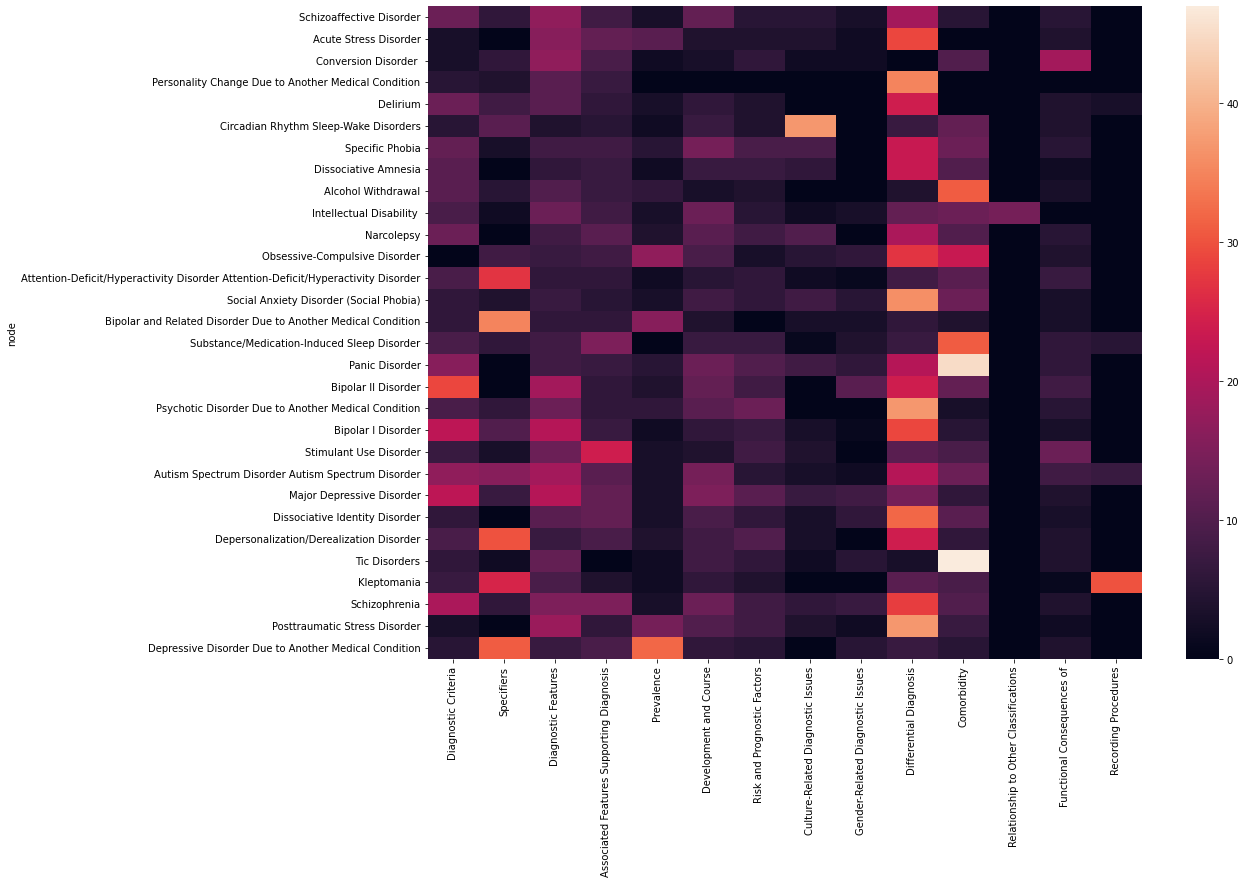

In [9]:
from comorbid_graphs.processable.utils import heatmap_plot_df 

query_string = """
inc_ancestor:  DSM-V
inc_text_longer: 100
"""
results_cg = cg.advanced_search(query_string)
results_cg.print_head(maxlevel=2)

# filter only the sections in the tree
node_list = [
    i for i in results_cg.get_nodes(exclude_head=True) 
    if i.type == 'default'
]

# check comorbid_graph.processable.label_handler_mixin
processed_df = results_cg.compare_section_annotations(node_list, include_stats=True)

# plot by ordering based on how many different annotations each disease has
# show top 10
heatmap_plot_df(
    processed_df
    .applymap(len)
    .sort_values('all')
    .iloc[1:-1,:-2]
    .tail(30)
)

### Results?
* `Depressive Disorder Due to Another Medical Condition` has most included terms
* `PTSD` and `Schizophrenia` are in top-5 because their Differential Diagnosis is difficult.
* `Panic Disorder` and `Tic Disorders` have most terms found in comorbidity section.

## Save for Later

In [10]:
# results_cg.write('search_results.yaml')